In [1]:
import numpy as np
import pandas as pd
import math

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

/var/folders/wk/v6_7rt617598d2dvw7x0z6140000gn/T/ipykernel_24364/45684106.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# script3_input_df_ic50_tokens_smiles.csv is manully created based on the csv generated from script1
# this csv basically contains all tokens and its corresponding smile and its reference 

df = pd.read_csv('script3_input_df_ic50_tokens_smiles.csv', header=0, low_memory=False)
df

,token,count,Canonical SMILES,Isomeric SMILES,reference,comment1,comment2
0,V,114,CC(C)C(C(=O)O)N,CC(C)[C@@H](C(=O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/Valine,NaN,NaN
1,L,255,CC(C)CC(C(=O)O)N,CC(C)C[C@@H](C(=O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/Leucine,NaN,NaN
2,H,25,C1=C(NC=N1)CC(C(=O)O)N,C1=C(NC=N1)C[C@@H](C(=O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/Hist...,NaN,NaN
3,D,40,C(C(C(=O)O)N)C(=O)O,C([C@@H](C(=O)O)N)C(=O)O,https://pubchem.ncbi.nlm.nih.gov/compound/5960,NaN,NaN
4,SCM_C,3,CC(C)CC(C(=O)O)N,NaN,NaN,NaN,NaN
5,E,68,C(CC(=O)O)C(C(=O)O)N,C(CC(=O)O)[C@@H](C(=O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/Glut...,NaN,NaN
6,A,69,CC(C(=O)O)N,C[C@@H](C(=O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/Alanine,NaN,NaN
7,F,68,C1=CC=C(C=C1)CC(C(=O)O)N,C1=CC=C(C=C1)C[C@@H](C(=O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/Phen...,NaN,NaN
8,CITR_R,31,C(CC(C(=O)O)N)CNC(=O)N,C(C[C@@H](C(=O)O)N)CNC(=O)N,https://pubchem.ncbi.nlm.nih.gov/compound/Citr...,NaN,NaN
9,C,53,C(C(C(=O)O)N)S,C([C@@H](C(=O)O)N)S,https://pubchem.ncbi.nlm.nih.gov/compound/Cyst...,NaN,NaN


<AxesSubplot:ylabel='token'>

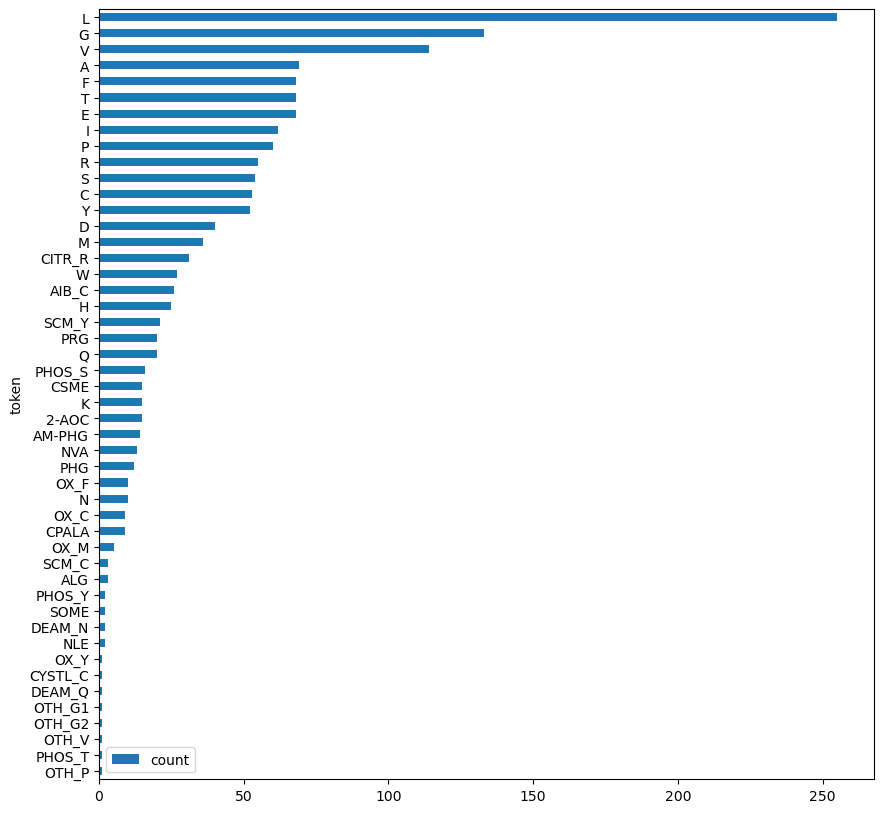

In [3]:
# sort df based on count column and then plot count vs token name
df_sorted = df.sort_values('count')
df_sorted.plot.barh(x="token", y="count", figsize = (10, 10))


In [4]:
# double check there isn't nan for smile column
df["Canonical SMILES"].isna().sum()

0

In [5]:
# helper functions to get rdkit's descriptor names
def get_descriptor_names():
    
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] 
                                    for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    return desc_names

In [6]:
names = get_descriptor_names()
len(names)

208

In [7]:
names

('MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

In [8]:
# helper function to generate descriptors
# input: smile of token
# output: list of descriptors with length of 208
def generate_descriptors(smile):
    descriptors = []
    
    if smile != smile:
        return descriptors
    
    else:
        smile = str(smile)
        mol = Chem.MolFromSmiles(smile)
        mol=Chem.AddHs(mol)
    
        calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] 
                                    for x in Descriptors._descList])
    
        descriptors = list(calc.CalcDescriptors(mol))
    
        return descriptors
        
    
    

In [9]:
#some test
res = generate_descriptors(np.nan)
type(res)

list

In [10]:
# test to make sure MolFromSmiles works normally
smile = "CC(C(=O)O)NC(=O)C"
aa = Chem.MolFromSmiles(smile)

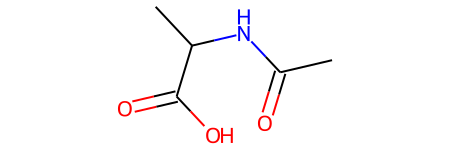

In [11]:
aa

In [12]:
# apply generate_descriptors to all smiles and use its out to create a new column 'descriptors'
df['descriptors'] = df['Canonical SMILES'].apply(generate_descriptors)

Traceback (most recent call last):
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/GraphDescriptors.py", line 124, in Ipc
    cPoly = abs(Graphs.CharacteristicPolynomial(mol, adjMat))
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/Graphs.py", line 43, in CharacteristicPolynomial
    res = numpy.zeros(nAtoms + 1, numpy.float)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/numpy/__init__.py", line 324, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you spec

Traceback (most recent call last):
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/GraphDescriptors.py", line 124, in Ipc
    cPoly = abs(Graphs.CharacteristicPolynomial(mol, adjMat))
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/Graphs.py", line 43, in CharacteristicPolynomial
    res = numpy.zeros(nAtoms + 1, numpy.float)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/numpy/__init__.py", line 324, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you spec

Traceback (most recent call last):
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/GraphDescriptors.py", line 124, in Ipc
    cPoly = abs(Graphs.CharacteristicPolynomial(mol, adjMat))
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/Graphs.py", line 43, in CharacteristicPolynomial
    res = numpy.zeros(nAtoms + 1, numpy.float)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/numpy/__init__.py", line 324, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you spec

Traceback (most recent call last):
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/ML/Descriptors/MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/GraphDescriptors.py", line 124, in Ipc
    cPoly = abs(Graphs.CharacteristicPolynomial(mol, adjMat))
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/rdkit/Chem/Graphs.py", line 43, in CharacteristicPolynomial
    res = numpy.zeros(nAtoms + 1, numpy.float)
  File "/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/numpy/__init__.py", line 324, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you spec

In [13]:
df_des = df['descriptors']

lists = []

for r in df_des:
    lists.append(r)

In [14]:
# give each descriptor a column name
# then created a new df called df_selected, which contains just descriptors values for all tokens
num_cols = 208
# generate range of ints for suffixes
# with length exactly half that of num_cols;
# if num_cols is even, truncate concatenated list later
# to get to original list length
# rng = range(1, (num_cols / 2) + 1)

new_cols = ['des_' + str(i) for i in range(num_cols)] 

# ensure the length of the new columns list is equal to the length of df's columns
#df.columns = new_cols[:num_cols]

In [15]:
df_selected = pd.DataFrame(columns=new_cols, data=lists)

In [16]:
# save df_selected to a csv
df_selected.to_csv('df_selected.csv')

In [17]:
df_selected

,des_0,des_1,des_2,des_3,des_4,des_5,des_6,des_7,des_8,des_9,...,des_198,des_199,des_200,des_201,des_202,des_203,des_204,des_205,des_206,des_207
0,11.316319,-3.852546,11.316319,0.865463,0.536977,117.148,106.060,117.078979,48,0,...,0,0,0,0,0,0,0,0,0,0
1,11.452884,-4.112963,11.452884,0.939838,0.583947,131.175,118.071,131.094629,54,0,...,0,0,0,0,0,0,0,0,0,0
2,11.406715,-3.379144,11.406715,0.061854,0.541194,155.157,146.085,155.069477,60,0,...,0,0,0,0,0,0,0,0,0,0
3,10.954358,-3.517477,10.954358,0.749213,0.452021,133.103,126.047,133.037508,52,0,...,0,0,0,0,0,0,0,0,0,0
4,11.452884,-4.112963,11.452884,0.939838,0.583947,131.175,118.071,131.094629,54,0,...,0,0,0,0,0,0,0,0,0,0
5,11.194924,-3.819676,11.194924,0.848285,0.485976,147.130,138.058,147.053158,58,0,...,0,0,0,0,0,0,0,0,0,0
6,10.682986,-3.227546,10.682986,0.614213,0.451352,89.094,82.038,89.047678,36,0,...,0,0,0,0,0,0,0,0,0,0
7,11.582460,-3.497248,11.582460,0.689882,0.690463,165.192,154.104,165.078979,64,0,...,0,0,0,0,0,0,0,0,0,0
8,11.503805,-4.139288,11.503805,0.801811,0.394159,175.188,162.084,175.095691,70,0,...,0,0,0,0,0,0,0,0,0,1
9,10.865208,-3.068287,10.865208,0.263935,0.424382,121.161,114.105,121.019749,42,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Data processing: normalized data
#from sklearn.preprocessing import StandardScaler
#x = StandardScaler().fit_transform(df_selected)

# skip the normalization for pca
# instead normalize data when building the model

In [19]:
# reduce the demention of descriptors from 208 to 10 using pca
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
#pca.fit(x)
x = df_selected
normalized_df_pca_10 = pca.fit_transform(x)

In [20]:
# 10 demension could cover 0.9975 variance
np.sum(pca.explained_variance_ratio_)

0.9975656816047445

In [21]:
normalized_df_pca_10

array([[-1.03947817e+02, -2.74494133e+01,  1.51298701e+01,
         6.49337259e+00, -5.36757745e+00,  1.06914902e+00,
        -2.46494665e+00, -3.89221408e-01,  5.56176555e+00,
         2.67002558e+00],
       [-1.92323608e+01, -3.21252191e+01,  3.05064795e+01,
         8.18432839e+00, -3.58468454e+00, -1.72294146e+00,
         1.48759364e+00, -5.04951436e-01,  4.12598137e+00,
         2.52452675e+00],
       [ 1.05143218e+02, -1.12068605e+01, -1.80495044e+01,
        -2.23228032e+01,  1.61371032e+01,  9.66849682e+00,
        -2.07977508e+00,  6.51780876e+00, -1.71760622e+00,
        -1.14412206e+00],
       [-1.32115209e+02,  3.28380312e+01, -1.34049082e+01,
        -1.61955218e+01, -6.49115424e+00,  8.25459878e+00,
         4.06858917e+00, -1.35011331e+00, -6.79944214e+00,
        -5.11267887e-01],
       [-1.92323608e+01, -3.21252191e+01,  3.05064795e+01,
         8.18432839e+00, -3.58468454e+00, -1.72294146e+00,
         1.48759364e+00, -5.04951436e-01,  4.12598137e+00,
         2.

In [22]:
# add a new column to df, this column contains the 10-d descriptors of each token
df['d10_descriptors'] = list(normalized_df_pca_10)

In [23]:
df['d10_descriptors'][0]

array([-103.94781735,  -27.44941333,   15.12987007,    6.49337259,
         -5.36757745,    1.06914902,   -2.46494665,   -0.38922141,
          5.56176555,    2.67002558])

In [24]:
token_dict = df.set_index('token')['d10_descriptors'].to_dict()
token_dict

{'V': array([-103.94781735,  -27.44941333,   15.12987007,    6.49337259,
          -5.36757745,    1.06914902,   -2.46494665,   -0.38922141,
           5.56176555,    2.67002558]),
 'L': array([-19.23236078, -32.12521912,  30.50647955,   8.18432839,
         -3.58468454,  -1.72294146,   1.48759364,  -0.50495144,
          4.12598137,   2.52452675]),
 'H': array([105.14321836, -11.20686048, -18.04950439, -22.32280317,
         16.13710315,   9.66849682,  -2.07977508,   6.51780876,
         -1.71760622,  -1.14412206]),
 'D': array([-132.11520931,   32.83803122,  -13.40490825,  -16.19552184,
          -6.49115424,    8.25459878,    4.06858917,   -1.35011331,
          -6.79944214,   -0.51126789]),
 'SCM_C': array([-19.23236078, -32.12521912,  30.50647955,   8.18432839,
         -3.58468454,  -1.72294146,   1.48759364,  -0.50495144,
          4.12598137,   2.52452675]),
 'E': array([-49.06271795,  28.4851333 ,   3.33409222, -13.8939876 ,
         -1.11169283,   7.29440651,   7.91893127,  -

In [25]:

# a slight manual change was made to df_HLA_A0201_positive_value_from_script2.csv
# which happens to line 17 in the scv
df2 = pd.read_csv('script3_input_df_HLA_A0201_positive_value.csv', header=0, low_memory=False)

In [26]:
df2 = df2.reset_index(drop=True)

In [27]:
# helper function to calculate count of token in each position
def get_token_freq_each_pos(all_token_lists):
    positions = {}
    
    i = 1
    
    while(i <= 10):
        positions[i] = {}
        i = i + 1
        
    for token_list in all_token_lists:
        token_list = token_list[1: -1].replace(" ", "")
    
        tokens = token_list.split(',')
        
        j = 0
        
        while ( j < len(tokens)):
            
            token = tokens[j][1:-1]
            
            token_cnt = positions[j]
            
            if token in token_cnt:
                token_cnt[token] = token_cnt[token] + 1
            else:
                token_cnt[token] = 1
                
            j = j + 1
                
    return positions
        
        

In [28]:
all_token_lists = df2['token_list']

positions = get_token_freq_each_pos(all_token_lists)



In [29]:
positions

{0: {'V': 7,
  'F': 2,
  'R': 13,
  'Y': 9,
  'S': 6,
  'G': 10,
  'K': 3,
  'A': 8,
  'N': 1,
  'OTH_G1': 1,
  'AM-PHG': 14,
  'CSME': 15,
  'SOME': 2,
  'PHG': 12,
  'Q': 1,
  'C': 5,
  'L': 12,
  'E': 6,
  'OX_M': 2,
  'I': 6,
  'M': 4,
  'W': 2,
  'CITR_R': 3,
  'H': 5,
  'AIB_C': 4,
  'DEAM_Q': 1,
  'OX_C': 1,
  'SCM_Y': 2,
  'T': 1},
 1: {'L': 52,
  'I': 5,
  'Q': 6,
  'T': 4,
  'V': 4,
  'OTH_V': 1,
  'NVA': 13,
  '2-AOC': 15,
  'NLE': 2,
  'CPALA': 9,
  'H': 4,
  'G': 7,
  'Y': 3,
  'CITR_R': 5,
  'F': 2,
  'S': 3,
  'P': 1,
  'M': 5,
  'A': 6,
  'W': 2,
  'OX_C': 1,
  'E': 1,
  'SCM_Y': 2,
  'C': 1,
  'R': 1,
  'AIB_C': 3},
 2: {'H': 3,
  'F': 4,
  'CITR_R': 4,
  'D': 10,
  'A': 20,
  'Y': 20,
  'Q': 1,
  'L': 23,
  'I': 2,
  'V': 11,
  'G': 20,
  'S': 8,
  'E': 5,
  'P': 5,
  'OX_M': 1,
  'DEAM_N': 1,
  'W': 3,
  'AIB_C': 4,
  'M': 2,
  'C': 3,
  'T': 2,
  'R': 2,
  'OX_C': 1,
  'SCM_Y': 2,
  'OX_F': 1},
 3: {'D': 21,
  'S': 7,
  'PHOS_S': 13,
  'P': 19,
  'G': 22,
  'OTH_P':

In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_dict_in_order(cnt_dict, key):
    sorted_dict = dict(sorted(cnt_dict.items(), key=lambda item: item[1]))
    names, counts = zip(*sorted_dict.items())
    plt.barh(names,counts, align='center')
    #fig, ax = plt.subplots()
    #ax.set_title(key)
    plt.title("token count in position: {}".format(key))
    plt.show()

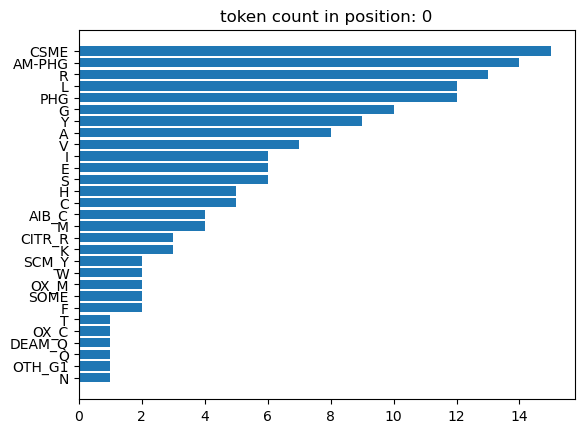

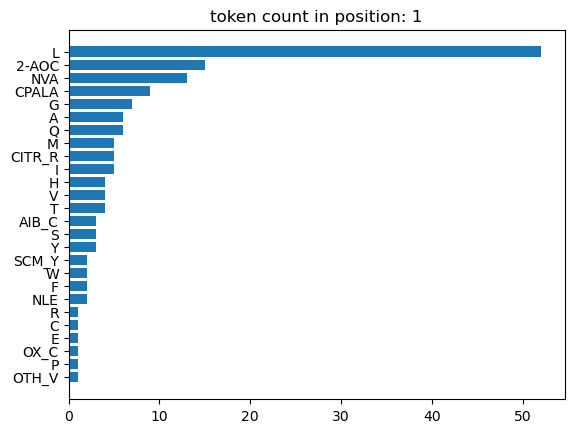

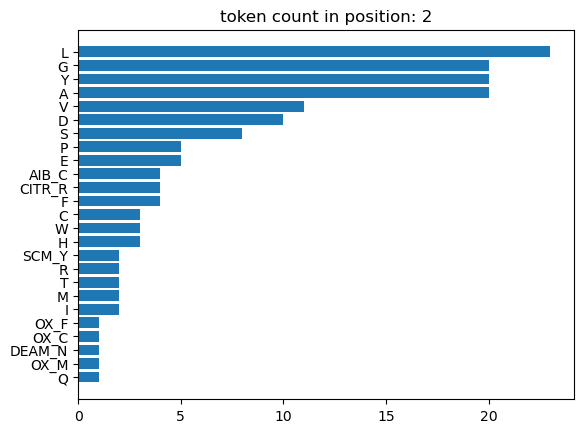

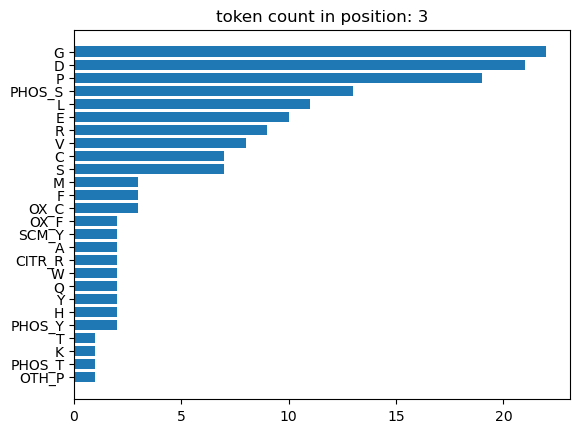

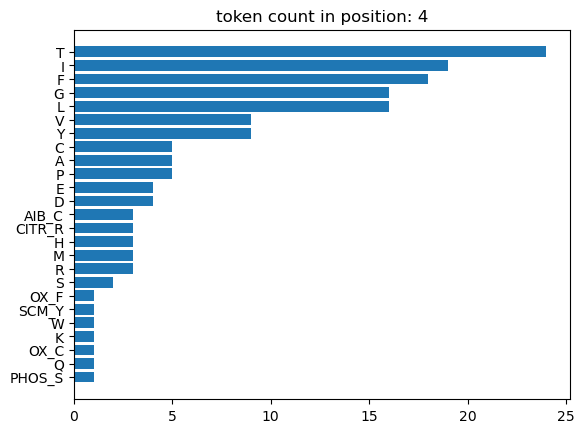

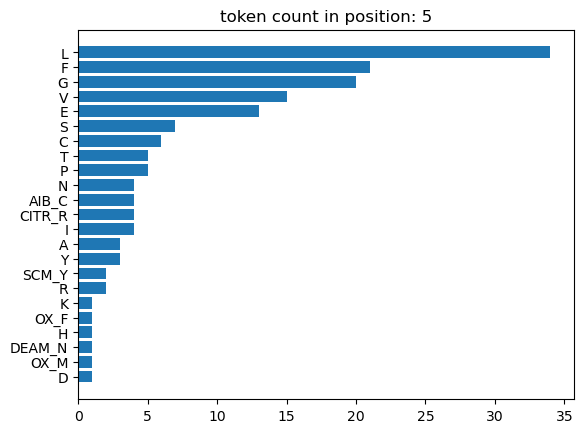

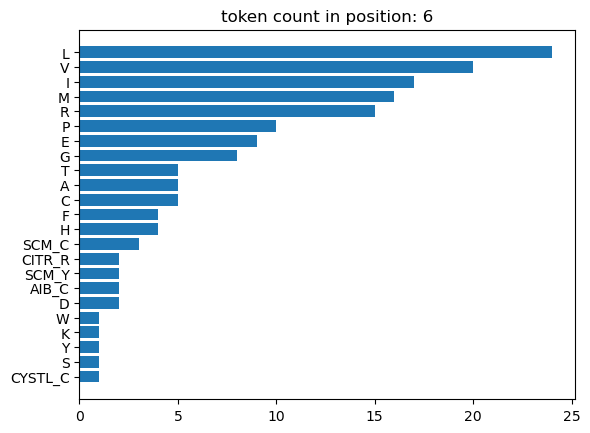

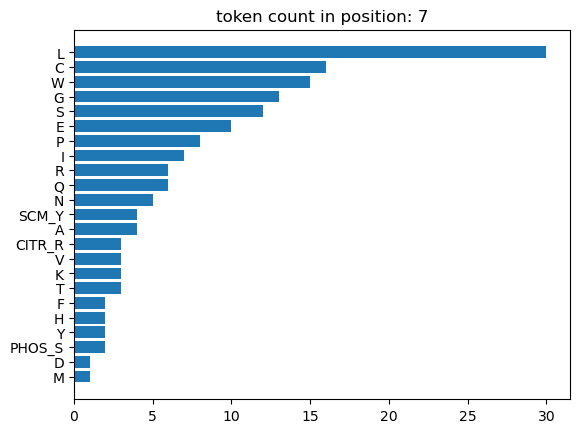

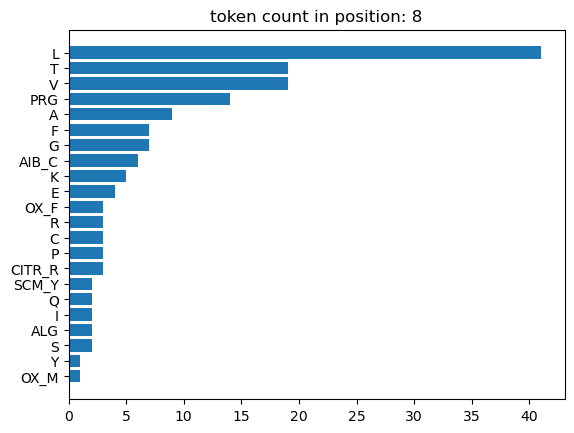

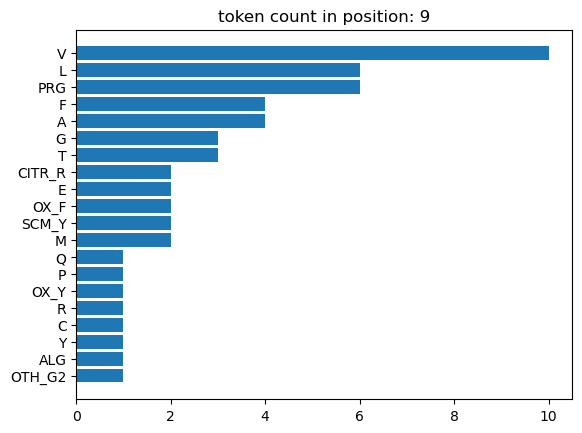

In [32]:
for key in positions:
    plot_dict_in_order(positions[key], key)

In [33]:
def gen_features(token_list):
    features = []
    mask = [0] * 10
    token_list = token_list[1: -1].replace(" ", "")
    
    tokens = token_list.split(',')
    
    for t in tokens:
        t = t[1: -1]
        if t in token_dict:
            features.extend(token_dict[t])
            
    if len(tokens) == 9:
        features.extend(mask)
        
    return features
        
        

In [34]:
# test
l = gen_features(df2['token_list'][0])

In [35]:
l


[-103.9478173453964,
 -27.449413332227625,
 15.129870071134938,
 6.493372594788108,
 -5.367577449896587,
 1.0691490235244165,
 -2.4649466523663257,
 -0.3892214082703068,
 5.561765554853469,
 2.6700255761872187,
 -19.232360781945932,
 -32.12521912015058,
 30.506479546957664,
 8.184328394425298,
 -3.584684537926873,
 -1.7229414571853983,
 1.4875936368804286,
 -0.5049514357949417,
 4.1259813698524,
 2.524526746551173,
 105.1432183578527,
 -11.206860479611219,
 -18.04950439144214,
 -22.322803165425327,
 16.13710315109195,
 9.668496824367987,
 -2.0797750812934153,
 6.517808757981678,
 -1.7176062224825537,
 -1.1441220596179213,
 -132.11520930555324,
 32.83803122275481,
 -13.404908249113763,
 -16.19552183504646,
 -6.491154235786804,
 8.254598779623597,
 4.068589167335173,
 -1.3501133127211926,
 -6.799442144285981,
 -0.5112678874516995,
 -132.11520930555324,
 32.83803122275481,
 -13.404908249113763,
 -16.19552183504646,
 -6.491154235786804,
 8.254598779623597,
 4.068589167335173,
 -1.350113312

In [36]:
len(l)

100

In [37]:
df2['features'] = df2['token_list'].apply(gen_features)

In [38]:
df2.Units.value_counts()

Units
nM    114
Name: count, dtype: int64

In [39]:
df2

,Unnamed: 0.1,Unnamed: 0,PMID,Name,Quantitative measurement,Qualitative Measurement,Starting Position,Ending Position,Source Molecule,Source Molecule IRI,...,Response measured,Units,HLA,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,token_list,features
0,108,18.0,19342659,VLHDDLCEA + SCM(C7),44.0,Positive,NaN,NaN,NaN,NaN,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,c7 = L (SCM_C = L),NaN,"['V', 'L', 'H', 'D', 'D', 'L', 'SCM_C', 'E', 'A']","[-103.9478173453964, -27.449413332227625, 15.1..."
1,109,20.0,19342659,VLFDDLCEA + SCM(C7),15.0,Positive,NaN,NaN,NaN,NaN,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,c7= L(SCM = L),NaN,"['V', 'L', 'F', 'D', 'D', 'L', 'SCM_C', 'E', 'A']","[-103.9478173453964, -27.449413332227625, 15.1..."
2,110,22.0,19342659,VLRDDLCEA + CITR(R3),44.0,Positive,NaN,NaN,NaN,NaN,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,c3 = citrulline,C(CC(C(=O)O)N)CNC(=O)N,"['V', 'L', 'CITR_R', 'D', 'D', 'L', 'C', 'E', ...","[-103.9478173453964, -27.449413332227625, 15.1..."
3,111,46.0,9075928,FIDSYICQV + CYSTL(C7),75.0,Positive,311.0,319.0,SMCY,http://www.ncbi.nlm.nih.gov/protein/AAC50806.1,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,CYSTL_C = cysteine = C,NaN,"['F', 'I', 'D', 'S', 'Y', 'I', 'CYSTL_C', 'Q',...","[198.2045912593752, -43.940266696381364, -22.3..."
4,112,65.0,18836451,RQASLSISV + PHOS(S4),38.5,Positive,526.0,534.0,protein kinase D2 isoform A,http://www.ncbi.nlm.nih.gov/protein/NP_057541.2,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,phos_s = PHOSPHOSERINE,NaN,"['R', 'Q', 'A', 'PHOS_S', 'L', 'S', 'I', 'S', ...","[130.18456110329075, 28.508620450511685, 30.35..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,269,42664.0,32571843,"ILCGTCLIV + AIB(C3, C6)",1103.0,Positive-Low,563.0,571.0,PH domain leucine-rich repeat-containing prote...,https://www.uniprot.org/uniprot/O60346.3,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,NaN,NaN,"['I', 'L', 'AIB_C', 'G', 'T', 'AIB_C', 'L', 'I...","[-4.306871382397924, -37.04394173117546, 29.79..."
154,270,42665.0,32571843,SCSRAVPQV + AIB(C2),1251.0,Positive-Low,NaN,NaN,NaN,NaN,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,NaN,NaN,"['S', 'AIB_C', 'S', 'R', 'A', 'V', 'P', 'Q', 'V']","[-219.61828787585932, 5.274561784393193, -17.1..."
155,271,42666.0,32571843,SCSRAIPQV + AIB(C2),1120.0,Positive-Low,122.0,130.0,cytoplasmic FMR1-interacting protein 1 isoform...,http://www.ncbi.nlm.nih.gov/protein/1022943302,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,NaN,NaN,"['S', 'AIB_C', 'S', 'R', 'A', 'I', 'P', 'Q', 'V']","[-219.61828787585932, 5.274561784393193, -17.1..."
156,272,42667.0,32571843,ACDPHSGHFV + AIB(C2),2272.0,Positive-Low,23.0,32.0,orf [Homo sapiens],http://www.ncbi.nlm.nih.gov/protein/763124,...,half maximal inhibitory concentration (IC50),nM,HLA-A*02:01,NaN,NaN,NaN,NaN,NaN,"['A', 'AIB_C', 'D', 'P', 'H', 'S', 'G', 'H', '...","[-248.12457551417086, -25.74920637202909, -11...."


In [40]:
df3 = df2[['Name', 'Quantitative measurement', 'Qualitative Measurement', 'features']]

In [41]:
for i in range(len(df3)):
    row = df3.iloc[i: i + 1, :]
    for num in row['features']:
        if num != num:
            print(i)

In [42]:
nan_rows = df3[df3['features'].isnull()]
nan_rows

,Name,Quantitative measurement,Qualitative Measurement,features


In [43]:
len(nan_rows)

0

<AxesSubplot:xlabel='IC 50', ylabel='Frequency'>

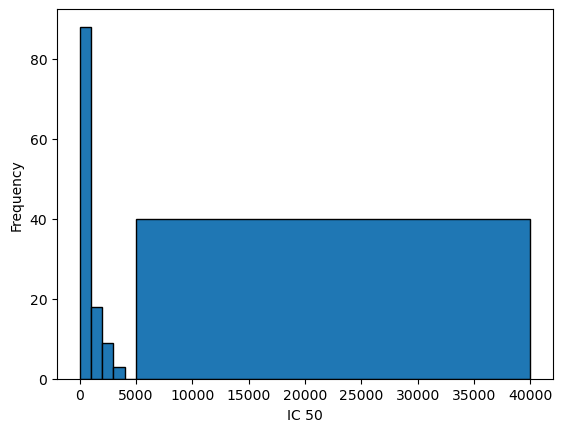

In [44]:
df3['Quantitative measurement'].plot(kind='hist', edgecolor='black', xlabel = 'IC 50', bins=[0, 1000, 2000, 3000, 4000, 5000, 40000])


In [45]:
print(df3['Quantitative measurement'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        44.0
1        15.0
2        44.0
3        75.0
4        38.5
        ...  
153    1103.0
154    1251.0
155    1120.0
156    2272.0
157     508.0
Name: Quantitative measurement, Length: 158, dtype: float64>


In [46]:
print(df3.dtypes)

Name                         object
Quantitative measurement    float64
Qualitative Measurement      object
features                     object
dtype: object


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [48]:
ls = []

for r in df3['features']:
    ls.append(r)

In [49]:
cols = ['f_' + str(i) for i in range(100)] 

In [50]:
df_X = pd.DataFrame(columns=cols, data=ls)
X = df_X.values
X



array([[-103.94781735,  -27.44941333,   15.12987007, ...,    0.        ,
           0.        ,    0.        ],
       [-103.94781735,  -27.44941333,   15.12987007, ...,    0.        ,
           0.        ,    0.        ],
       [-103.94781735,  -27.44941333,   15.12987007, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [-219.61828788,    5.27456178,  -17.10476831, ...,    0.        ,
           0.        ,    0.        ],
       [-248.12457551,  -25.74920637,  -11.62551337, ...,   -0.38922141,
           5.56176555,    2.67002558],
       [ 130.1845611 ,   28.50862045,   30.35302936, ...,    0.        ,
           0.        ,    0.        ]])

In [51]:
df_X.to_csv('df_X_HLA_A0201_peptide.csv')

In [52]:
df_X

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,-103.947817,-27.449413,15.129870,6.493373,-5.367577,1.069149,-2.464947,-0.389221,5.561766,2.670026,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-103.947817,-27.449413,15.129870,6.493373,-5.367577,1.069149,-2.464947,-0.389221,5.561766,2.670026,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-103.947817,-27.449413,15.129870,6.493373,-5.367577,1.069149,-2.464947,-0.389221,5.561766,2.670026,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,198.204591,-43.940267,-22.320134,10.401365,-10.995303,0.600395,-8.020406,2.710074,-0.920998,1.437148,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,130.184561,28.508620,30.353029,-31.274193,3.358468,-10.834714,-15.720327,-12.028492,9.757881,-0.411496,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,-4.306871,-37.043942,29.791259,7.126067,-4.388184,4.942765,-2.180133,2.103797,5.444718,1.053913,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
154,-219.618288,5.274562,-17.104768,-12.536879,-2.681660,-5.927848,-6.714570,6.837753,2.136056,-5.134204,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
155,-219.618288,5.274562,-17.104768,-12.536879,-2.681660,-5.927848,-6.714570,6.837753,2.136056,-5.134204,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
156,-248.124576,-25.749206,-11.625513,-3.942674,-2.184511,-3.833195,1.777902,-3.320133,-1.958566,0.813106,...,-103.947817,-27.449413,15.12987,6.493373,-5.367577,1.069149,-2.464947,-0.389221,5.561766,2.670026


In [53]:
df_Y = df3.iloc[:, 1:2]

In [54]:
df_Y

,Quantitative measurement
0,44.0
1,15.0
2,44.0
3,75.0
4,38.5
...,...
153,1103.0
154,1251.0
155,1120.0
156,2272.0


In [55]:
df_Y.to_csv('df_Y_HLA_A0201_peptide.csv')

In [56]:
ic50 = df3.iloc[:, 1:2].values
ic50

array([[4.4000e+01],
       [1.5000e+01],
       [4.4000e+01],
       [7.5000e+01],
       [3.8500e+01],
       [1.1690e+02],
       [1.4570e+02],
       [1.8050e+02],
       [1.6870e+02],
       [6.2400e+01],
       [4.4600e+01],
       [1.7850e+02],
       [3.2500e+01],
       [5.8700e+01],
       [7.3300e+03],
       [5.1000e+02],
       [5.1000e+02],
       [2.6000e+02],
       [4.0000e+02],
       [4.1000e+02],
       [4.8000e+02],
       [5.1000e+02],
       [4.7000e+02],
       [9.7000e+02],
       [8.7000e+02],
       [1.1300e+03],
       [1.3600e+03],
       [2.2000e+02],
       [1.1300e+03],
       [7.1000e+02],
       [5.1000e+02],
       [4.6000e+02],
       [7.1000e+02],
       [6.5000e+02],
       [5.2000e+02],
       [4.1000e+02],
       [9.4000e+02],
       [6.7000e+02],
       [5.1000e+02],
       [8.0000e+02],
       [6.0000e+02],
       [5.7000e+02],
       [7.4000e+02],
       [5.7000e+02],
       [1.6900e+03],
       [1.0500e+03],
       [1.0300e+03],
       [1.050

In [57]:
# makes a huge difference by log y
ic50 = np.log(ic50)

#print(ic50)

i = 0

while (i < len(ic50)):
    
    if ic50[i] != ic50[i]:
        print(i)
    i = i + 1

In [58]:
def log_of_ic50(ic50):
    log_ic50 = math.log(ic50, 10)
    return log_ic50

In [59]:
df3['log_ic50'] = df3['Quantitative measurement'].apply(log_of_ic50)

/var/folders/wk/v6_7rt617598d2dvw7x0z6140000gn/T/ipykernel_24364/3543115749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_ic50'] = df3['Quantitative measurement'].apply(log_of_ic50)


In [60]:
df3

,Name,Quantitative measurement,Qualitative Measurement,features,log_ic50
0,VLHDDLCEA + SCM(C7),44.0,Positive,"[-103.9478173453964, -27.449413332227625, 15.1...",1.643453
1,VLFDDLCEA + SCM(C7),15.0,Positive,"[-103.9478173453964, -27.449413332227625, 15.1...",1.176091
2,VLRDDLCEA + CITR(R3),44.0,Positive,"[-103.9478173453964, -27.449413332227625, 15.1...",1.643453
3,FIDSYICQV + CYSTL(C7),75.0,Positive,"[198.2045912593752, -43.940266696381364, -22.3...",1.875061
4,RQASLSISV + PHOS(S4),38.5,Positive,"[130.18456110329075, 28.508620450511685, 30.35...",1.585461
...,...,...,...,...,...
153,"ILCGTCLIV + AIB(C3, C6)",1103.0,Positive-Low,"[-4.306871382397924, -37.04394173117546, 29.79...",3.042576
154,SCSRAVPQV + AIB(C2),1251.0,Positive-Low,"[-219.61828787585932, 5.274561784393193, -17.1...",3.097257
155,SCSRAIPQV + AIB(C2),1120.0,Positive-Low,"[-219.61828787585932, 5.274561784393193, -17.1...",3.049218
156,ACDPHSGHFV + AIB(C2),2272.0,Positive-Low,"[-248.12457551417086, -25.74920637202909, -11....",3.356408


In [61]:
y = df3.iloc[:, -1].values
i = 0

while (i < len(y)):
    
    if y[i] != y[i]:
        print(i)
    i = i + 1

In [62]:
df_log_Y = df3.iloc[:, -1]

In [63]:
df_log_Y

0      1.643453
1      1.176091
2      1.643453
3      1.875061
4      1.585461
         ...   
153    3.042576
154    3.097257
155    3.049218
156    3.356408
157    2.705864
Name: log_ic50, Length: 158, dtype: float64

In [64]:
df_log_Y.to_csv('df_log_Y_HLA_A0201_peptide.csv')

In [65]:
y

array([ 1.64345268,  1.17609126,  1.64345268,  1.87506126,  1.58546073,
        2.06781451,  2.16345955,  2.25647721,  2.22711508,  1.79518459,
        1.64933486,  2.25163822,  1.51188336,  1.7686381 ,  3.86510397,
        2.70757018,  2.70757018,  2.41497335,  2.60205999,  2.61278386,
        2.68124124,  2.70757018,  2.67209786,  2.98677173,  2.93951925,
        3.05307844,  3.13353891,  2.34242268,  3.05307844,  2.85125835,
        2.70757018,  2.66275783,  2.85125835,  2.81291336,  2.71600334,
        2.61278386,  2.97312785,  2.8260748 ,  2.70757018,  2.90308999,
        2.77815125,  2.75587486,  2.86923172,  2.75587486,  3.2278867 ,
        3.0211893 ,  3.01283722,  3.0211893 ,  3.00432137,  2.66275783,
        2.97772361,  2.89762709,  2.93449845,  2.79934055,  2.60205999,
        2.79239169,  2.93951925,  2.86332286,  2.96848295,  1.8920946 ,
        1.76342799,  2.32428246,  1.8260748 ,  1.58546073,  1.40654018,
        4.57844436,  4.58292655,  4.55037513,  4.58433122,  4.58

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



# function to Calculate train metrics

def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    
    train_metrics = {}

    train_metrics['RMSE'] = mean_squared_error(y_train, y_train_pred, squared = False)

    train_metrics['R^2'] = r2_score(y_train, y_train_pred)




    # Calculate test metrics

    test_metrics = {}

    test_metrics['RMSE'] = mean_squared_error(y_test, y_test_pred, squared = False)

    test_metrics['R^2'] = r2_score(y_test, y_test_pred)




    # Print

    print('train metrics:', train_metrics, sep='\n')

    print('test metrics:', test_metrics, sep='\n')


In [67]:
### function for visualization

def plot_figure(y_train, y_train_pred, y_test, y_test_pred):
    
    plt.figure()

    plt.scatter(y_train, y_train_pred,c='r',marker='o')

    plt.scatter(y_test, y_test_pred,c='b',marker='o')

    plt.plot(c='k')

    plt.xlabel('Observed binding affinity_log(ic50)')

    plt.ylabel('Predicted binding affinity_log(ic50)')

    #plt.xlim([3,11])

    #plt.ylim([3,11])

    plt.legend(['Training Set', 'Test Set'])

    plt.savefig('results_pls.jpg', dpi=600)

    plt.show()

/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


train metrics:
{'RMSE': 0.4511113065960027, 'R^2': 0.8034117329643757}
test metrics:
{'RMSE': 0.7384617105315322, 'R^2': 0.563869211323881}


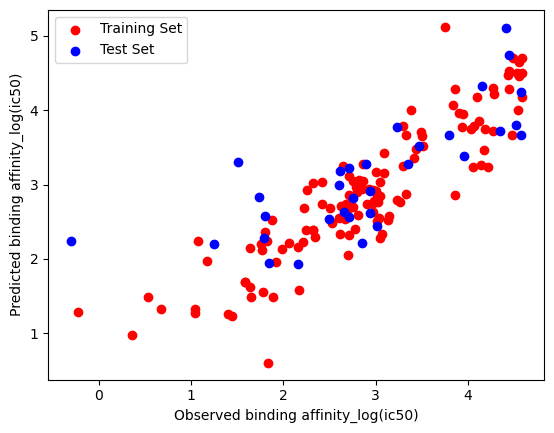

/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


train metrics:
{'RMSE': 0.441198937173529, 'R^2': 0.7986824529885609}
test metrics:
{'RMSE': 0.8009690832967303, 'R^2': 0.5779743490483693}


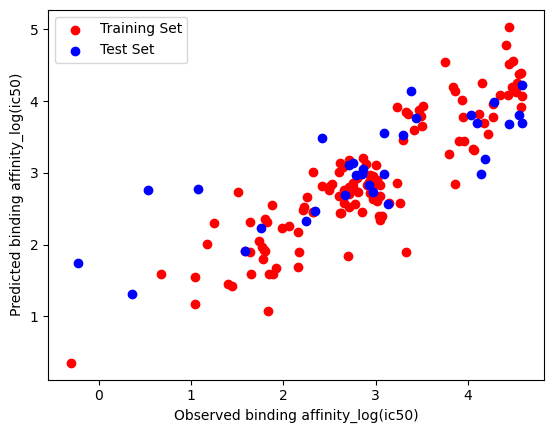

/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


train metrics:
{'RMSE': 0.4499262637050975, 'R^2': 0.8249435571322757}
test metrics:
{'RMSE': 0.6163086108937689, 'R^2': 0.5088550068410687}


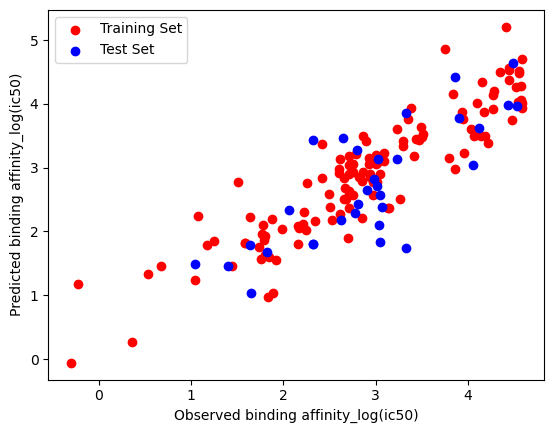

/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


train metrics:
{'RMSE': 0.4570613192818411, 'R^2': 0.8010352933741223}
test metrics:
{'RMSE': 0.6193127882626768, 'R^2': 0.6761195838137011}


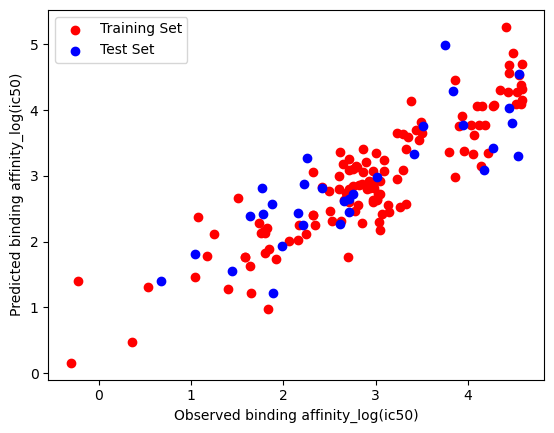

/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/sj/opt/anaconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


train metrics:
{'RMSE': 0.4550222721865245, 'R^2': 0.8252652792897092}
test metrics:
{'RMSE': 0.6766069196675469, 'R^2': 0.2871259979726277}


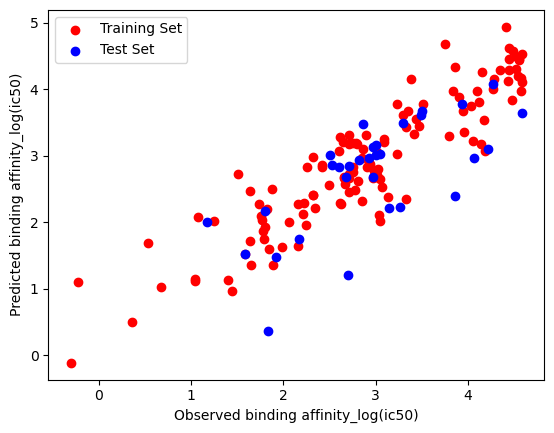

In [68]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

######  PLS regression using 5-fold

# train_test_split and standardScale the data


ss_X = StandardScaler()
ss_Y = StandardScaler()


kFold=KFold(n_splits=5, shuffle=True, random_state = 42)


for train_index, test_index in kFold.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    X_train = ss_X.fit_transform(X_train)
    X_test = ss_X.transform(X_test)



    # pls model

    pls1 = PLSRegression(n_components=3)  
    # n_components Hyper Parameter!

    pls1.fit(X_train, y_train)

    # predict

    y_train_pred = pls1.predict(X_train)

    y_test_pred = pls1.predict(X_test)
    
    print_metrics(y_train, y_train_pred, y_test, y_test_pred)
    
    plot_figure(y_train, y_train_pred, y_test, y_test_pred)
   


In [69]:
from sklearn.model_selection import KFold, cross_val_score



random_states = [42,24,86,99,123,1,10]
# List of random state numbers


# Create a DataFrame to store the results

results_df = pd.DataFrame(columns=['n_components','RMSE Mean','R^2 Mean'])




for n_components in range(2,11):

    # Initialize PLS regression model

    pls = PLSRegression(n_components=n_components)

    rmse_mean_list = []

    r2_mean_list = []




    for random_state in random_states:

        cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

        # Compute cross-validated RMSE and R^2 scores

        cv_rmse = -cross_val_score(pls, X, y, cv=cv, scoring='neg_root_mean_squared_error')
        print(cv_rmse)

        cv_r2 = cross_val_score(pls, X, y, cv=cv, scoring='r2')
        print(cv_r2)




        rmse_mean_list.append(cv_rmse.mean())

        r2_mean_list.append(cv_r2.mean())




    # Calculate mean RMSE and R^2 across the 5 random states

    rmse_mean = np.mean(rmse_mean_list)
    print('rmse_mean:', rmse_mean)

    r2_mean = np.mean(r2_mean_list)
    print('r2_mean:', r2_mean)




    # Add the results to the DataFrame

    results_df.loc[n_components - 2] = [n_components, rmse_mean, r2_mean]





[0.76154223 0.87798611 0.65829454 0.69175543 0.62034566]
[0.53618076 0.49291282 0.43965725 0.59591777 0.40075088]
[0.77840213 0.74295781 0.79789333 0.86675758 0.69095232]
[0.376461   0.42677824 0.45924114 0.30423567 0.52942588]
[0.73422078 0.67641773 0.86927414 0.61943939 0.81497574]
[0.51907612 0.58368114 0.41194982 0.50318187 0.30651313]
[0.90379157 0.68310261 0.60203659 0.72027436 0.9560024 ]
[0.34947602 0.47528558 0.47046291 0.5823804  0.28963164]
[0.77167278 0.69080806 0.68926963 0.86984721 0.91014658]
[0.21642454 0.5273525  0.49645279 0.37622771 0.39737778]
[0.76697921 0.88929154 0.73605764 0.64065894 0.76878554]
[0.3073735  0.36410511 0.4996767  0.58838169 0.49350834]
[0.69733511 0.69484467 0.78892594 0.88895439 0.71186692]
[0.53493011 0.50173097 0.3571689  0.39075812 0.45529118]
rmse_mean: 0.7594819035158871
r2_mean: 0.4445702849709486
[0.73846171 0.80096908 0.61630861 0.61931279 0.67660692]
[0.56386921 0.57797435 0.50885501 0.67611958 0.287126  ]
[0.80570113 0.64100446 0.77187

In [70]:
results_df

,n_components,RMSE Mean,R^2 Mean
0,2.0,0.759482,0.444570
1,3.0,0.735032,0.476683
2,4.0,0.742774,0.463560
3,5.0,0.750308,0.451051
4,6.0,0.766611,0.425406
5,7.0,0.785895,0.395163
6,8.0,0.809789,0.355716
7,9.0,0.827401,0.325212
8,10.0,0.852369,0.282937


In [71]:
import lazypredict

from lazypredict.Supervised import LazyRegressor

from sklearn.metrics import mean_squared_error
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin


X = X.astype(np.float32)

######  lazy regression

# train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=100)




# pls model

chosen_regressors = ['AdaBoostRegressor','BaggingRegressor','BayesianRidge', 'DecisionTreeRegressor', 'DummyRegressor',
            'ElasticNet', 'ElasticNetCV', 'ExtraTreeRegressor', 'ExtraTreesRegressor','GaussianProcessRegressor',
             'GradientBoostingRegressor', 'HistGradientBoostingRegressor', 'HuberRegressor',  'KNeighborsRegressor',
             'KernelRidge','Lars', 'LarsCV',  'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LinearRegression',
             'LinearSVR', 'MLPRegressor', 'NuSVR', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV',
             'PassiveAggressiveRegressor', 'QuantileRegressor', 'RANSACRegressor', 'RandomForestRegressor',
             'RidgeCV', 'SGDRegressor', 'SVR', 'TransformedTargetRegressor', 'TweedieRegressor', 'TweedieRegressor']

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]

reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)









'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  3%|█▏                                          | 1/36 [00:00<00:05,  6.75it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5601931574303185, 'Adjusted R-Squared': 1.2811879813150422, 'RMSE': 0.5787393658800342, 'Time taken': 0.14786005020141602}


 11%|████▉                                       | 4/36 [00:00<00:01, 17.03it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.4532490850293287, 'Adjusted R-Squared': 1.349562060391085, 'RMSE': 0.6452779016481284, 'Time taken': 0.05840921401977539}
{'Model': 'BayesianRidge', 'R-Squared': 0.33172273273469044, 'Adjusted R-Squared': 1.4272592364483128, 'RMSE': 0.7133955190929148, 'Time taken': 0.035877227783203125}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.4412780051613536, 'Adjusted R-Squared': 1.921472822972013, 'RMSE': 1.0476733884207416, 'Time taken': 0.01729893684387207}
{'Model': 'DummyRegressor', 'R-Squared': -0.00012673938688712028, 'Adjusted R-Squared': 1.639425292394895, 'RMSE': 0.8727292915840192, 'Time taken': 0.012125968933105469}
{'Model': 'ElasticNet', 'R-Squared': -0.00012674141571444864, 'Adjusted R-Squared': 1.6394252936920142, 'RMSE': 0.8727292924692156, 'Time taken': 0.012135028839111328}


 19%|████████▌                                   | 7/36 [00:01<00:05,  5.00it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.145287481903708, 'Adjusted R-Squared': 1.546455544356646, 'RMSE': 0.8067928959999983, 'Time taken': 0.9405760765075684}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.34378714726221804, 'Adjusted R-Squared': 1.4195459222421885, 'RMSE': 0.7069267234868574, 'Time taken': 0.012054920196533203}


 25%|███████████                                 | 9/36 [00:01<00:04,  5.74it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.5152117271712526, 'Adjusted R-Squared': 1.3099466006610023, 'RMSE': 0.6076144394294636, 'Time taken': 0.23473787307739258}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -9.468543459979154, 'Adjusted R-Squared': 7.693003195724377, 'RMSE': 2.823547923544094, 'Time taken': 0.023314952850341797}


 33%|██████████████▎                            | 12/36 [00:01<00:03,  7.03it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3399988118374857, 'Adjusted R-Squared': 1.4219679727596404, 'RMSE': 0.7089643409331627, 'Time taken': 0.1858382225036621}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.45827593545792233, 'Adjusted R-Squared': 1.346348172412148, 'RMSE': 0.6423046961232748, 'Time taken': 0.10081982612609863}
{'Model': 'HuberRegressor', 'R-Squared': -0.1749174155037041, 'Adjusted R-Squared': 1.75117670827286, 'RMSE': 0.945922822246028, 'Time taken': 0.05705523490905762}


 39%|████████████████▋                          | 14/36 [00:01<00:02,  8.43it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.16715582002653062, 'Adjusted R-Squared': 1.7462143767382736, 'RMSE': 0.9427932253657985, 'Time taken': 0.09129691123962402}
{'Model': 'KernelRidge', 'R-Squared': -12.738291744289404, 'Adjusted R-Squared': 9.783498000447324, 'RMSE': 3.234583751019936, 'Time taken': 0.01679372787475586}
{'Model': 'Lars', 'R-Squared': -9.375277302429804e+26, 'Adjusted R-Squared': 5.99402975073381e+26, 'RMSE': 26720470082844.457, 'Time taken': 0.06295180320739746}


 47%|████████████████████▎                      | 17/36 [00:02<00:01,  9.88it/s]

{'Model': 'LarsCV', 'R-Squared': 0.28079558999167764, 'Adjusted R-Squared': 1.4598192129561405, 'RMSE': 0.7400792094304584, 'Time taken': 0.1530768871307373}
{'Model': 'Lasso', 'R-Squared': -0.00012674141571444864, 'Adjusted R-Squared': 1.6394252936920142, 'RMSE': 0.8727292924692156, 'Time taken': 0.013590097427368164}


 53%|██████████████████████▋                    | 19/36 [00:03<00:04,  3.72it/s]

{'Model': 'LassoCV', 'R-Squared': 0.08483028302593199, 'Adjusted R-Squared': 1.5851085075735845, 'RMSE': 0.8348392391182151, 'Time taken': 1.3450450897216797}
{'Model': 'LassoLars', 'R-Squared': -0.00012674141571444864, 'Adjusted R-Squared': 1.6394252936920142, 'RMSE': 0.8727292924692156, 'Time taken': 0.01123809814453125}


 67%|████████████████████████████▋              | 24/36 [00:04<00:02,  5.81it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.08544366873639553, 'Adjusted R-Squared': 1.5847163429390259, 'RMSE': 0.83455941982171, 'Time taken': 0.32157301902770996}
{'Model': 'LinearRegression', 'R-Squared': -2782683.9741330715, 'Adjusted R-Squared': 1779094.671986718, 'RMSE': 1455.7408016541501, 'Time taken': 0.016610145568847656}
{'Model': 'LinearSVR', 'R-Squared': -1.0154408045179264, 'Adjusted R-Squared': 2.2885605143639203, 'RMSE': 1.2389022927588678, 'Time taken': 0.05587506294250488}
{'Model': 'MLPRegressor', 'R-Squared': 0.019236365588470417, 'Adjusted R-Squared': 1.6270456023286828, 'RMSE': 0.8642396960119728, 'Time taken': 0.12361001968383789}
{'Model': 'NuSVR', 'R-Squared': 0.4866693712850899, 'Adjusted R-Squared': 1.3281949921292049, 'RMSE': 0.6252455682409699, 'Time taken': 0.014353752136230469}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.06307730557793756, 'Adjusted R-Squared': 1.599016148892794, 'RMSE': 0.8447027586262962, 'Time taken': 0.010789871215820312}
{'Mod

 83%|███████████████████████████████████▊       | 30/36 [00:04<00:00,  8.29it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -5010.679243971979, 'Adjusted R-Squared': 3205.1883690968393, 'RMSE': 61.779397274538276, 'Time taken': 0.3519611358642578}


100%|███████████████████████████████████████████| 36/36 [00:04<00:00,  7.27it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5065597804730131, 'Adjusted R-Squared': 1.3154781731402048, 'RMSE': 0.6130124653197655, 'Time taken': 0.379849910736084}
{'Model': 'RidgeCV', 'R-Squared': 0.3144932395402974, 'Adjusted R-Squared': 1.4382748140644002, 'RMSE': 0.7225333609738038, 'Time taken': 0.010889768600463867}
{'Model': 'SGDRegressor', 'R-Squared': 0.24903063794647007, 'Adjusted R-Squared': 1.4801279527883224, 'RMSE': 0.7562460907873624, 'Time taken': 0.012556076049804688}
{'Model': 'SVR', 'R-Squared': 0.5042366630240589, 'Adjusted R-Squared': 1.3169634449518313, 'RMSE': 0.6144538027565543, 'Time taken': 0.012985944747924805}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -2782683.9741330715, 'Adjusted R-Squared': 1779094.671986718, 'RMSE': 1455.7408016541501, 'Time taken': 0.01484370231628418}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4562868527952002, 'Adjusted R-Squared': 1.3476198809997901, 'RMSE': 0.6434828111529249, 'Time taken': 0.014672040939331055}


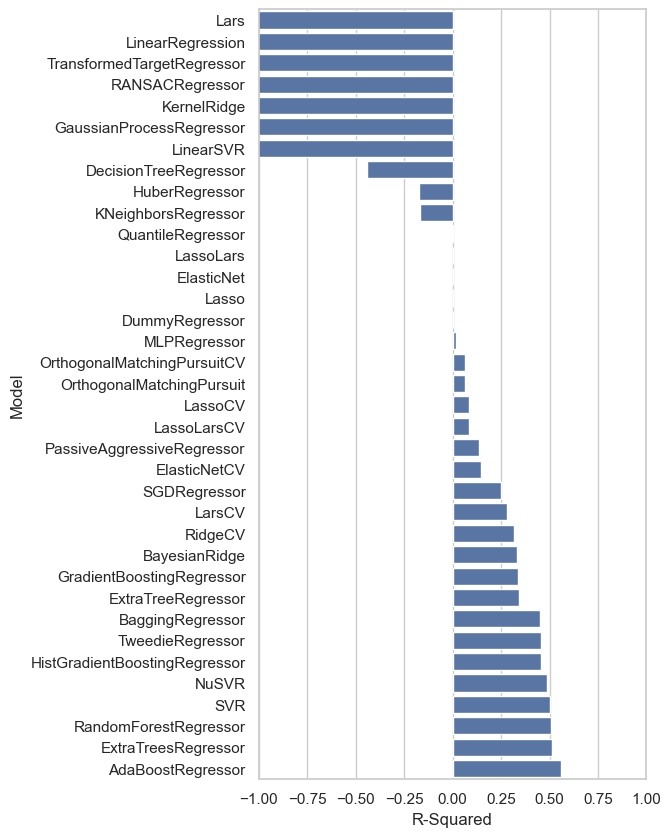

In [74]:
# Bar plot of R-squared values

import matplotlib.pyplot as plt

import seaborn as sns




#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]



plt.figure(figsize=(5,10))

sns.set_theme(style="whitegrid")

ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)

ax.set(xlim=(-1,1))

plt.savefig('plot_lazyRegressor.png', dpi=600, bbox_inches='tight')
